# LAB 5
### Car Crashes 
#### By: DEL

## Abstract

Welome to my fifth lab! In this lab I will be exploring data visualizations and what they add to my lab. I will be looking at a Car Crash data set. This dataset includes interesting data, such as total amount of car accidents, if the person was speeding or drinking when they got into that car accident, if they were distracted, if they have every gotten into a accident before and a few other interesting points.

Questions I am looking to answer: 
* What causes the most car crashes?
* How many people drink alcohol while driving?
* Do people who get in car crashes get in them again?
* How many are speeding when they get into car accidents?
* What state has the most car accidents?
* What state has the least car accidents?


## Data Exploration

This dataset comes from seaborn on github (https://github.com/mwaskom/seaborn-data/blob/master/car_crashes.csv). This dataset is a small one but the information I can pull from it is pretty significant. This dataset has 8 columns that include what I included above in the abstract. This dataset is from March 28th, 2015. I will be looking at which states have the most car accidents, what is happening with someone when they get into a car accident for example: are they drinking? are they distracted? I will also be looking at if people who have gotten into a car accident before are more likely to get into a car accident again. 

In [118]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns  #IMPORTANT - UPGRADE SEABORN TO VERSION 0.9.0 IN ANACONDA ENV
import statsmodels.api as sm
import statsmodels.formula.api as smf

I want to make the name of this dataset simple and easy to remember so I am going to call it "cc".

In [119]:
cc.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


The columns tell me what causes car accidents. Some include: speeding and alcohol. 

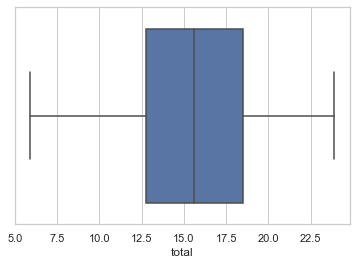

In [120]:
sns.set(style='whitegrid')
cc = sns.load_dataset('car_crashes')
ax = sns.boxplot(x=cc['total'])


The box plot shows the quartile ranges and where the middle number of amount of car accidents.

From here I can tell: 

* that the average number of car accidents is around 15.5. 
* that the minimum amount of car accidents is around 6.
* the maximum number of car accidents is around 23. 

This graph just furthers concludes what describe() told me above. This is further evidence for those numbers.


In [121]:
cc = sns.load_dataset("car_crashes")

I want to know the names of the columns so I will get them to open down below.

In [122]:
cc.columns 

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

* Index tells me the data index of the variable. 
* In this case we confirm that cc.index is actually the range starting from the 0.

In [123]:
cc.index

RangeIndex(start=0, stop=51, step=1)

## Data Modeling

In [124]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
total             51 non-null float64
speeding          51 non-null float64
alcohol           51 non-null float64
not_distracted    51 non-null float64
no_previous       51 non-null float64
ins_premium       51 non-null float64
ins_losses        51 non-null float64
abbrev            51 non-null object
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [125]:
cc.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


The first thing I am going to do is group by state because I am interested in knowing the breakdown of each column by state. I won't yet analyze what is going on in each state yet, I just want to get an idea of what I am looking at and figure out which graphs to use based on the data.

In [126]:
# applying group() funtions to 
# group the data on team value 
gk = cc.groupby ('abbrev')

type (gk)

# Let's print the first entries 
# In all the groups formed 
gk.first ()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48


Now, I am going to group by "speeding" to figure out which state had the most car crashes by speeding.

In [127]:
# applying group() funtions to 
# group the data on speeding value 
gk = cc.groupby ('speeding')

type (gk)

# Let's print the first entries 
# In all the groups formed 
gk.first ()

,total,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
speeding,,,,,,,
1.792,11.2,3.136,9.632,8.736,1301.52,159.85,NJ
1.886,8.2,2.870,7.134,6.560,1011.14,135.63,MA
1.937,14.9,5.215,13.857,13.410,732.28,114.82,NE
2.006,5.9,1.593,5.900,5.900,1273.89,136.05,DC
2.208,9.6,2.784,8.448,8.448,777.18,133.35,MN
2.413,12.7,3.429,11.049,11.176,768.95,153.72,VA
2.640,17.6,5.456,1.760,17.600,896.07,155.77,MS
2.669,15.7,3.925,15.229,13.659,649.06,114.47,IA
2.964,15.6,3.900,14.820,14.508,913.15,142.80,GA


This is really interesting to me because since the dataset is so small, I am able to find which state had the most speeding accidents, based on this - I can see that it was Hawaii. Hawaii had about 9 speeding accidents that were recorded. I can tell that the state with the least amount of accidents because of speeding is New Jersey. 

I am now going to use speeding data and total number of car accidents in a scatter plot. I am going to switch it up a little and use both speeding and alcohol to show how much of total car accidents are caused by each of those factors. 

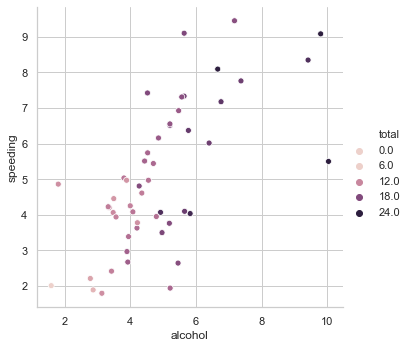

In [128]:
cc = sns.load_dataset("car_crashes") 
sns.relplot (x="alcohol", y= "speeding", hue = "total", data = cc, kind = "scatter") 

This graph is very clear and shows how much of car accidents are speeding related. It is clear and shows me the numbers on speeding and alcohol and which leads to more accidents. 

# Data Analysis and Conclusions

For my fine graph, I am going to make a graph for only the speeding part of the data, I think I will use a barplot to see more data then I would be able to in a different graph!

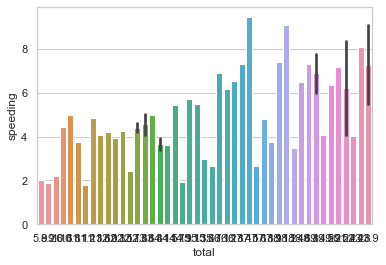

In [129]:
sns.set(style="whitegrid")
cc = sns.load_dataset("car_crashes")
ax = sns.barplot(x="total", y= "speeding", data=cc) 

This graph has a lot of colors and looks really nice. It shows the state and how many car accidents were caused by speeding. It is very hard to change the abbrev but it is based by state and how many car accidents are caused by speeding. 

From the data I found and the graphs I made I was able to conclude a lot of things. Such as the state with the highest number of accidents related to speeding: Hawaii. I also found the state with the least number of accidents related to speeding: New Jersey. I was also surprised to find based on the scatter plot that speeding accidents are less common than any type of accident. 

# Aknowledgements 

Shoutout the class for making awesome and helpful graphs. Shoutout Ms. Sconyers for answering questions about my dataset and helping me figure out code. Shoutout June specifically for helping me figure out why my graphs kept getting errors. And finally shoutout to myself for not giving up on this lab even when it got super difficult and I felt like I wasn't going to finish it. 